In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

### Bernoulli Understanding

#### Full Binomial Distribution Formula:
$$
P(X = k) = p^k \cdot (1 - p)^{n - k}
$$

But, understanding starts with the simplest example first:

### Bernoulli:
- Only **n = 1** (one trial)
- **2 possible outcomes**: Success (e.g., heads) or Failure (e.g., tails)
- **Probability of getting heads (success)** is \( p = 0.5 \)

If we want to find the probability of getting exactly 1 head (meaning 1 success):

- \( P(\text{Success}) = 0.5 \)
- \( P(\text{Failure}) = 1 - P(\text{Success}) = 0.5 \)

The Bernoulli formula is:
$$
P(X = k) = p^k \cdot (1 - p)^{n - k}
$$

Where:
- \( k \) is the number of successes we want
- \( P(X = k) \) is the probability of exactly \( k \) successes
- \( n \) is the number of times we repeat the experiment; here it is only 1 because a Bernoulli trial has just one trial
- Notice there is **no "choose" function** here because, in a Bernoulli trial, we do not need to consider different ways to arrange successes across multiple trials.

#### Calculation:
Using the formula with \( k = 1 \) and \( n = 1 \):
$$
P(X = 1) = p^1 \cdot (1 - p)^{1 - 1}
$$

Substituting values:
$$
p^1 = 0.5 \text{, which is the probability of success.}
$$

$$
(1 - p)^{1 - 1} = 1
$$

So:
$$f
P(X = 1) = 0.5 \cdot 1 = 0.5 \text{, which is the probability of failure.}
$$

$$
P(X = 1) = 0.5 \cdot 1 = 0.5
$$

In [2]:
def probability_of_successes(p):
	return p

def probability_of_failures(p):
	return 1-p

def bernoulli_probability(p,l,n):
	pass

def factorial(x):
    if x == 0 or x == 1:
        return 1
    result = 1
    for i in range(2, x + 1):
        result *= i
    return result

def choose(n,k):
	if k>n or k<0:
		return 0
	return factorial(n) / (factorial(k) * factorial(n-k))

def binomial_probability(n,k,p):
    return choose(n, k) * (p ** k) * ((1 - p) ** (n - k))


def bernoulli_distribution(p,k):
	return binomial_probability(1,k,p)

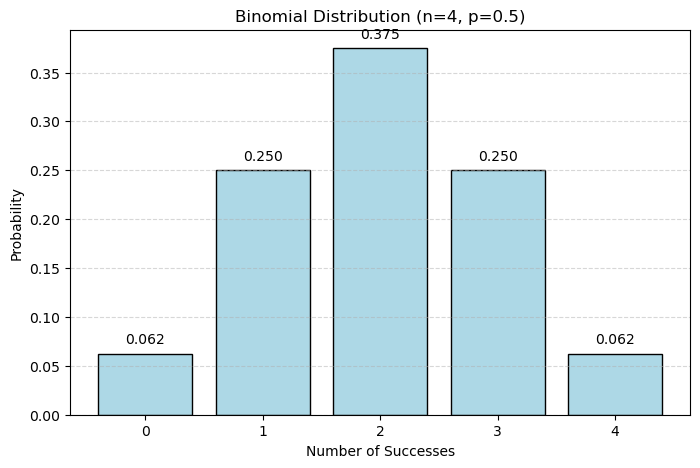

'\n- roughly 68% of data will be within 1 standard deviation of the mean\n'

In [3]:
n = 4
p = 0.5
x = np.arange(0,n+1)
pmf_values = [binomial_probability(n,k,p) for k in x]
pmf_values

plt.figure(figsize=(8, 5))
plt.bar(x, pmf_values, color='lightblue', edgecolor='black')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, value in enumerate(pmf_values):
    plt.text(x[i], value + 0.01, f'{value:.3f}', ha='center')

plt.show()

'''
- roughly 68% of data will be within 1 standard deviation of the mean
'''

### Mathematical Correlation to Graph

The following math verifies that the probabilities calculated for \( n = 4 \) and \( p = 0.5 \) match the values shown in the plotted binomial distribution.

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

#### Calculations:
$$
P(X = 0) = \binom{4}{0} \cdot 0.5^0 \cdot 0.5^4 = 1 \cdot 1 \cdot 0.0625 = 0.0625
$$

$$
P(X = 1) = \binom{4}{1} \cdot 0.5^1 \cdot 0.5^3 = 4 \cdot 0.5 \cdot 0.125 = 0.25
$$

$$
P(X = 2) = \binom{4}{2} \cdot 0.5^2 \cdot 0.5^2 = 6 \cdot 0.25 \cdot 0.25 = 0.375
$$

$$
P(X = 3) = \binom{4}{3} \cdot 0.5^3 \cdot 0.5^1 = 4 \cdot 0.125 \cdot 0.5 = 0.25
$$

$$
P(X = 4) = \binom{4}{4} \cdot 0.5^4 \cdot 0.5^0 = 1 \cdot 0.0625 \cdot 1 = 0.0625
$$

#### Verification:
$$
\sum_{k=0}^{4} P(X = k) = 0.0625 + 0.25 + 0.375 + 0.25 + 0.0625 = 1
$$

These values align with the graph, confirming that the mathematical probabilities match the visual representation.

/Users/freddiekiessling/anaconda3/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


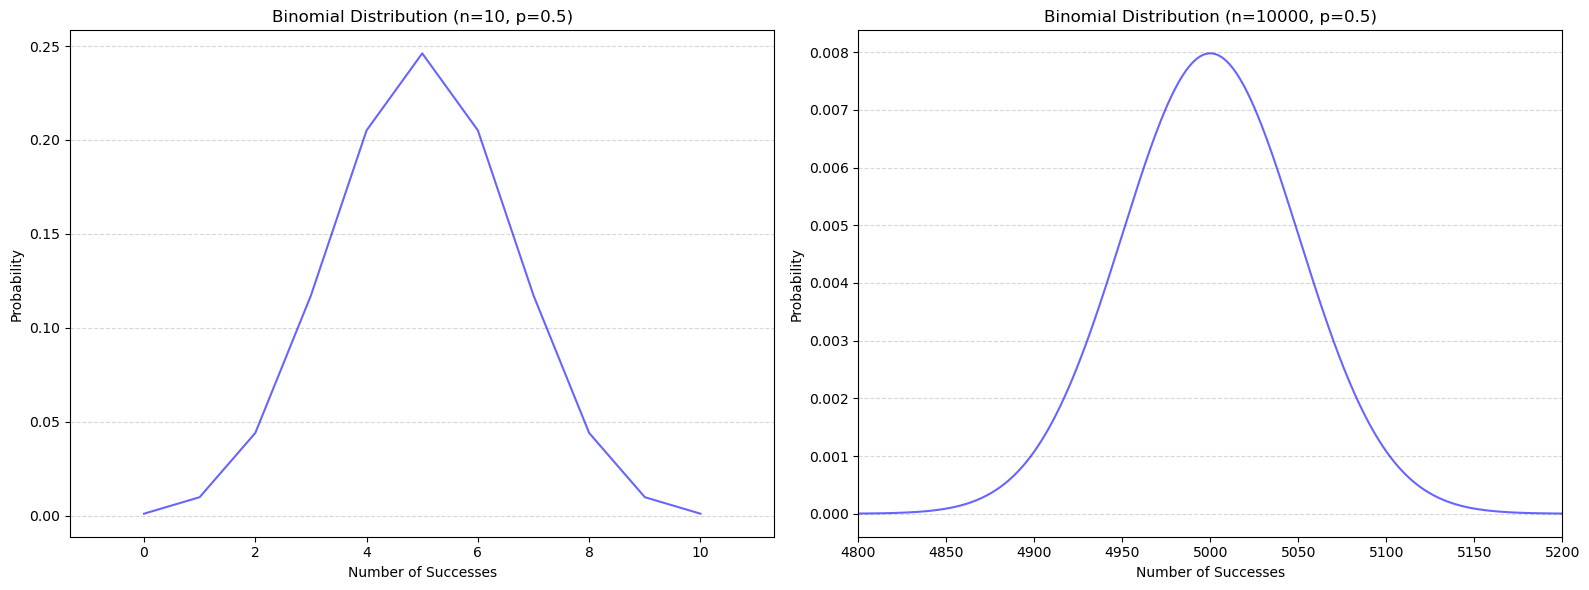

For n=10, mean ≈ 5.0, standard deviation ≈ 1.5811388300841898
For n=10000, mean ≈ 5000.0, standard deviation ≈ 50.0


In [5]:
n_values = [10,10000]
p = 0.5
plt.figure(figsize=(16, 6))

for i, n in enumerate(n_values):
    x = np.arange(0, n + 1)
    pmf_values = binom.pmf(x, n, p)
    plt.subplot(1, 2, i + 1)
    plt.plot(x, pmf_values, color='blue', alpha=0.6)
    plt.title(f'Binomial Distribution (n={n}, p={p})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xlim(n * p - 4 * np.sqrt(n * p * (1 - p)), n * p + 4 * np.sqrt(n * p * (1 - p)))
    
plt.tight_layout()
plt.show()
print(f"For n={n_values[0]}, mean ≈ {n_values[0] * p}, standard deviation ≈ {np.sqrt(n_values[0] * p * (1 - p))}")
print(f"For n={n_values[1]}, mean ≈ {n_values[1] * p}, standard deviation ≈ {np.sqrt(n_values[1] * p * (1 - p))}")

